In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
#empty lists for data desired in columns for eventual df
cities_w_data = []
lats_data = []
longs_data = []
temps = []
cnesses = []
hums = []
wspeeds = []
dates = []
country_codes = []

#for loop for calling api for each city in the cities list
key = weather_api_key
unit = 'imperial'
for x in range (0, len(cities)):
    try:
        #include try/except in case a city can't be found in OWM
        city_name = cities[x]
        final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
        data = requests.get(final_url).json()
        lat = data['coord']['lat']
        lats_data.append(lat)
        lng = data['coord']['lon']
        longs_data.append(lng)
        temp = data['main']['temp_max']
        temps.append(temp)
        cness = data['clouds']['all']
        cnesses.append(cness)
        hum = data['main']['humidity']
        hums.append(hum)
        wspeed = data['wind']['speed']
        wspeeds.append(wspeed)
        date = data['dt']
        dates.append(date)
        country = data['sys']['country']
        country_codes.append(country)
        print(f'working on record {x+1}: {city_name}')
        #only appending city name at end, to make sure that cities that don't have data aren't appended
        cities_w_data.append(city_name)
    except KeyError:
        print(f'City {city_name} not found, skipping.')
        continue

working on record 1: upernavik
working on record 2: punta arenas
City louisbourg not found, skipping.
working on record 4: mataura
working on record 5: dalby
working on record 6: bluff
working on record 7: vestmannaeyjar
City umzimvubu not found, skipping.
City amderma not found, skipping.
working on record 10: kamenka
working on record 11: liuzhou
working on record 12: ushuaia
working on record 13: mweka
working on record 14: arraial do cabo
working on record 15: kavieng
working on record 16: butaritari
working on record 17: popondetta
working on record 18: vaini
working on record 19: bredasdorp
working on record 20: kapaa
working on record 21: emerald
working on record 22: lorengau
working on record 23: albany
working on record 24: ponte de sor
working on record 25: dikson
working on record 26: clyde river
working on record 27: arlit
working on record 28: kahului
working on record 29: alofi
working on record 30: hobart
working on record 31: severo-kurilsk
City grand river south east 

working on record 258: cabo san lucas
working on record 259: lolodorf
working on record 260: umm lajj
working on record 261: torbay
working on record 262: galbshtadt
working on record 263: jinxiang
City meyungs not found, skipping.
working on record 265: miraflores
working on record 266: kembe
working on record 267: bulawayo
City mys shmidta not found, skipping.
working on record 269: finschhafen
working on record 270: nioro
working on record 271: saint george
working on record 272: hurricane
working on record 273: cidreira
working on record 274: dok kham tai
working on record 275: isla mujeres
working on record 276: togur
working on record 277: doha
working on record 278: belmonte
working on record 279: belyy
City warqla not found, skipping.
City chagda not found, skipping.
working on record 282: ambon
working on record 283: duku
working on record 284: at-bashi
working on record 285: le pradet
City tiruvottiyur not found, skipping.
working on record 287: luderitz
working on record 288

working on record 509: sorkjosen
working on record 510: anshun
working on record 511: ajdabiya
working on record 512: port macquarie
working on record 513: inta
working on record 514: kostomuksha
working on record 515: kangaatsiaq
working on record 516: nabire
working on record 517: puerto ayacucho
working on record 518: betsiamites
working on record 519: merauke
working on record 520: marystown
working on record 521: pangnirtung
working on record 522: shenjiamen
working on record 523: walvis bay
working on record 524: kemang
City utiroa not found, skipping.
working on record 526: chake chake
working on record 527: shadegan
working on record 528: clonakilty
City marcona not found, skipping.
working on record 530: teyateyaneng
working on record 531: thinadhoo
working on record 532: meadow lake
working on record 533: high level
working on record 534: malakal
working on record 535: pathein
working on record 536: moose factory
working on record 537: khani
working on record 538: rio grande


In [5]:
#making sure lists are all of same length
print(len(cities_w_data))
print(len(lats_data))
print(len(longs_data))
print(len(temps))
print(len(cnesses))
print(len(hums))
print(len(wspeeds))
print(len(dates))
print(len(country_codes))

553
553
553
553
553
553
553
553
553


In [6]:
#creating df for weather info
weather_data_df = pd.DataFrame({'city_name': cities_w_data,
                                'lat': lats_data,
                                'long': longs_data,
                                'max_temp': temps,
                                'cloudiness': cnesses,
                                'humidity': hums,
                                'wind_speed': wspeeds,
                                'country_code': country_codes,
                                'date_of_measurement': dates
                               })
#checking df length
print(len(weather_data_df))
#checking for any null values
print(weather_data_df.isnull().value_counts())
#printing sample of data
weather_data_df.sample(10)

553
city_name  lat    long   max_temp  cloudiness  humidity  wind_speed  country_code  date_of_measurement
False      False  False  False     False       False     False       False         False                  553
dtype: int64


,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
356,fortuna foothills,32.66,-114.41,51.80,1,19,13.87,US,1608823830
45,port alfred,-33.59,26.89,69.01,61,77,12.77,ZA,1608823788
479,chake chake,-5.25,39.77,81.27,25,77,11.05,TZ,1608823841
314,jibuti,11.50,42.50,78.80,1,69,8.05,DJ,1608823825
218,tuatapere,-46.13,167.68,46.99,3,84,4.00,NZ,1608823798
318,burdur,37.72,30.29,44.60,0,66,3.36,TR,1608823826
117,tasiilaq,65.61,-37.64,30.20,100,92,18.34,GL,1608823792
254,doha,25.29,51.53,71.60,0,68,5.82,QA,1608823532
383,grand-santi,4.25,-54.38,82.72,100,76,4.88,GF,1608823832
464,anshun,26.25,105.93,41.36,100,84,6.91,CN,1608823840


In [7]:
#finding max humidity value to see if any have to be removed
weather_data_df['humidity'].max()

100

In [8]:
#saving weather data as csv
output_path = 'outputs/cities.csv'
weather_data_df.to_csv(output_path, index=False)

In [3]:
#reading csv back in, so as to have a stable point for making graphs (not dependant on cells that will change w/ every running)
path = 'outputs/cities.csv'
weather_df = pd.read_csv(path)
weather_df.sample(10)

,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
64,chuy,-33.70,-53.46,77.95,10,61,13.31,UY,1608823789
431,arys,42.43,68.80,32.00,100,86,4.47,KZ,1608823837
379,tecoanapa,16.52,-98.75,84.47,0,57,0.56,MX,1608823832
325,qaqortoq,60.72,-46.03,32.00,100,96,21.92,GL,1608823827
180,pavlikeni,43.24,25.32,48.00,76,100,3.36,BG,1608823796
78,lata,40.16,-8.33,55.00,0,58,12.75,PT,1608823790
190,iquique,-20.22,-70.14,71.60,0,64,12.75,CL,1608823711
261,luderitz,-26.65,15.16,78.80,0,47,24.16,NaN,1608823810
506,kayerkan,69.35,87.76,-41.80,20,64,6.71,RU,1608823843
187,norilsk,69.35,88.20,-41.80,20,64,6.71,RU,1608823796


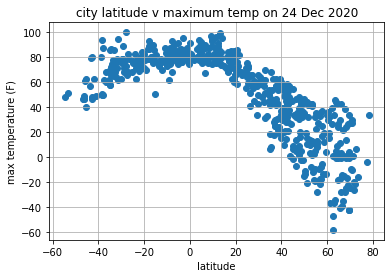

In [4]:
#scatter for temp v. lat
x_axis1 = weather_df['lat']
y_axis1 = weather_df['max_temp']
plt.title('city latitude v maximum temp on 24 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1, y_axis1)
plt.savefig('outputs/tempLatAllCities.png', bbox_inches='tight')
plt.show()

The above plot shows the maximum temperature (F) of 553 randomly selected cities, taken on 24 December 2020, and compares those temperatures to each city's latitude (degrees north or south of the equator). The plot seems to follow a parabolic curve, which grows more diffuse as the latitude increases above 20 degrees.

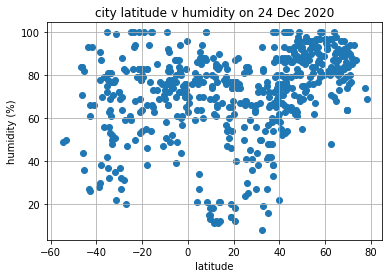

In [5]:
#scatter for hum v. lat
x_axis2 = weather_df['lat']
y_axis2 = weather_df['humidity']
plt.title('city latitude v humidity on 24 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2, y_axis2)
plt.savefig('outputs/humLatAllCities.png', bbox_inches='tight')
plt.show()

The above plot shows the humidity of 553 randomly selected cities, taken on 24 December 2020, and compares those humidities to each city's latitude (degrees north or south of the equator). There does not appear to be a clear relationship between the humidity and the latitude.

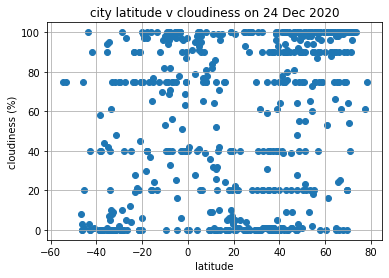

In [6]:
#scatter for cloudiness v. lat
x_axis3 = weather_df['lat']
y_axis3 = weather_df['cloudiness']
plt.title('city latitude v cloudiness on 24 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.grid()
plt.scatter(x_axis3, y_axis3)
plt.savefig('outputs/cloudLatAllCities.png', bbox_inches='tight')
plt.show()

The above plot shows the cloudiness of 553 randomly selected cities, taken on 24 December 2020, and compares those to each city's latitude (degrees north or south of the equator). There seems to be a degree of stratification in the data: at 0%, 20%, 40%, ~75% and 100%, there are clusters of data points, ranging from latitudes of -40 to +80 degrees.  

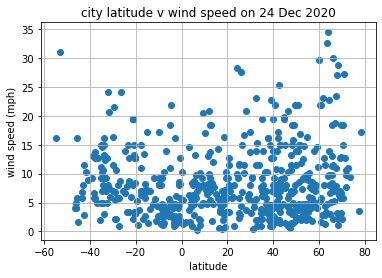

In [7]:
#scatter for wind speed v. lat
x_axis4 = weather_df['lat']
y_axis4 = weather_df['wind_speed']
plt.title('city latitude v wind speed on 24 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.grid()
plt.scatter(x_axis4, y_axis4)
plt.savefig('outputs/windLatAllCities.png', bbox_inches='tight')
plt.show()

The above plot shows the wind speed of 553 randomly selected cities, taken on 24 December 2020, and compares those to each city's latitude (degrees north or south of the equator). Most cities, irrespective of latitude, have wind speeds between 0 - 20 mph, but there are some data points with wind speed increasing as latitude increasing above zero, and decreasing below zero, which may suggest that as the distance away from the equator increases, wind speed also increases. 

In [8]:
#filtering only northern hemisphere cities
northern_hemi_data_df = weather_df[weather_df['lat'] > 0]
print(len(northern_hemi_data_df))
northern_hemi_data_df.sample(10)

378


,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
137,vyyezdnoye,55.38,43.79,10.53,100,96,8.84,RU,1608823793
205,morant bay,17.88,-76.41,84.99,20,65,6.93,JM,1608823797
78,lata,40.16,-8.33,55.00,0,58,12.75,PT,1608823790
441,raton,36.90,-104.44,18.00,1,60,4.70,US,1608823565
545,vostok,46.49,135.88,-6.79,97,93,4.16,RU,1608823846
296,puerto cabello,10.47,-68.01,80.01,9,74,7.25,VE,1608823823
518,bodden town,19.28,-81.25,84.99,20,74,9.17,KY,1608823844
23,arlit,18.74,7.39,83.14,10,14,6.38,NE,1608823787
259,at-bashi,41.17,75.81,9.64,78,67,1.59,KG,1608823806
350,yayva,59.33,57.26,3.99,100,80,4.00,RU,1608823829


In [9]:
#filtering only southern hemisphere cities
southern_hemi_data_df = weather_df[weather_df['lat'] < 0]
print(len(southern_hemi_data_df))
southern_hemi_data_df.sample(10)

175


,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
81,castro,-24.79,-50.01,75.06,4,59,6.62,BR,1608823727
246,finschhafen,-6.60,147.87,80.24,98,77,3.91,PG,1608823800
450,ulladulla,-35.35,150.47,61.00,90,100,9.17,AU,1608823838
135,picota,-6.92,-76.33,86.00,75,74,3.36,PE,1608823793
147,naranjal,-2.67,-79.62,81.00,40,57,4.70,EC,1608823794
519,ahipara,-35.17,173.17,62.19,94,72,11.10,NZ,1608823844
109,namibe,-15.20,12.15,77.00,75,73,17.22,AO,1608823792
512,voh,-20.97,164.70,76.12,45,83,3.29,NC,1608823844
366,putina,-15.47,-69.43,50.86,77,65,7.29,PE,1608823831
352,fray bentos,-33.13,-58.30,86.00,9,48,7.00,UY,1608823829


In [19]:
def scatter_linreg(x_axis, y_axis, x_axis_label, y_axis_label, date, hemisphere):
    (slope, intercept, rval, pval, stderr) = linregress(x_axis, y_axis)
    print(f'The r-value is {round(rval, 2)}')
    show_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    y_linreg = (slope * x_axis) + intercept
    plt.title(f'{x_axis_label} v {y_axis_label} on {date} in the {hemisphere} hemisphere')
    plt.xlabel(f'{x_axis_label}')
    plt.ylabel(f'{y_axis_label}')
    plt.grid()
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, y_linreg, color='limegreen')
    annotate_x = x_axis.median()
    annotate_y = (y_axis.min()) + 10
    plt.annotate(show_eq, (annotate_x, annotate_y), color='red')
    plt.savefig(f'outputs/{hemisphere}{x_axis_label}v{y_axis_label}.png', bbox_inches='tight')
    plt.show()

The r-value is -0.85


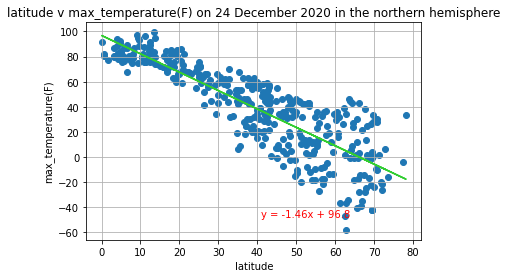

In [20]:
#scatter for northern hemi temp v. lat, using function
scatter_linreg(northern_hemi_data_df['lat'], northern_hemi_data_df['max_temp'], 'latitude', 'max_temperature(F)', '24 December 2020', 'northern')

The r-value is 0.62


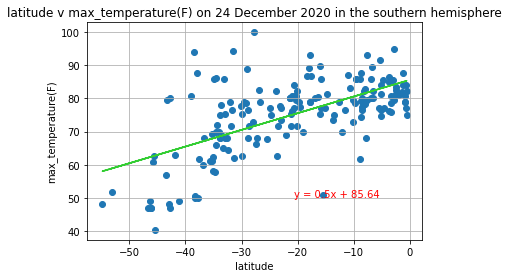

In [21]:
#scatter for southern hemi temp v. lat
scatter_linreg(southern_hemi_data_df['lat'], southern_hemi_data_df['max_temp'], 'latitude', 'max_temperature(F)', '24 December 2020', 'southern')

The above graphs show a linear regression done on the latitude of all of the 553 randomly selected cities located in the northern hemisphere (378 cities) and southern hemisphere (175 cities), compared to those cities' maximum temperature measured on 24 December 2020. There is a fairly strong negative correlation between the maximum temperature and the latitude in the northern hemisphere: as the latitude increases (grows further away from the equator), the maximum temperature decreases. This makes sense, as the equator receives the most direct sunlight/heat, and therefore, as the distance from the equator increases, less heat reaches cities located at those latitudes. There is a moderately strong positive correlation between maximum temperature and latitude in the southern hemisphere, which also makes sense as the mirror image of the northern hemisphere: in both, as the distance to the equator decreases, and more direct sunlight reaches cities at those locations, the maximum temperature should increase. The correlation appears less strong than in the northern hemisphere. This could be due to the fact that fewer cities (175 vs. 378) were collected for the southern hemisphere, so it could be that potential temperature outliers are having more weight in the data. 

The r-value is 0.45


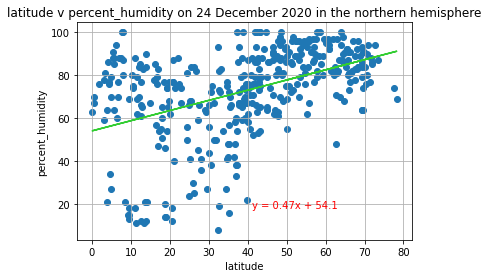

In [22]:
#scatter for northern hemisphere hum v. lat
scatter_linreg(northern_hemi_data_df['lat'], northern_hemi_data_df['humidity'], 'latitude', 'percent_humidity', '24 December 2020', 'northern')

The r-value is 0.24


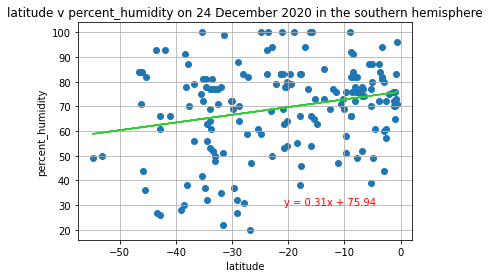

In [23]:
#scatter for southern hemisphere hum v. lat
scatter_linreg(southern_hemi_data_df['lat'], southern_hemi_data_df['humidity'], 'latitude', 'percent_humidity', '24 December 2020', 'southern')

The above graph shows a linear regression done on the latitude of all of the 553 randomly selected cities located in the northern hemisphere (378 cities), and in the southern hemisphere (175 cities), compared to those cities' humidity measured on 24 December 2020. There is a weak positive correlation between latitude and humidity in the northern hemisphere: as latitude increases, humidity also increases. There is also a weak positive correlation between latitude and humidity in the southern hemisphere, though the correlation is even weaker than in the northern hemisphere. In both hemispheres, there is a lot of spread in humidity for each latitude. One might expect that the northern and southern hemispheres would be mirror images of each other: as latitudes are further away from the equator, the same relationship should be observed. However, in this case, the hemispheres are not mirrors: in the southern hemisphere, as latitudes grow further from the equator, humidity decreases; in the northern hemisphere, as latitudes are further away from the equator, humidity increases. This could be highlighting a difference in the poles: during December, the northern hemisphere is in winter, whilst the southern hemisphere is in summer; the lack of mirroring could be due to seasonal variation in humidity. It could be also, or alternatively, be a result of the fewer data points in the southern hemisphere. Both hemispheres show a large amount of variation in humidity per latitude, so the fewer data points in the south might be shifting the linear regression.  

The r-value is 0.31


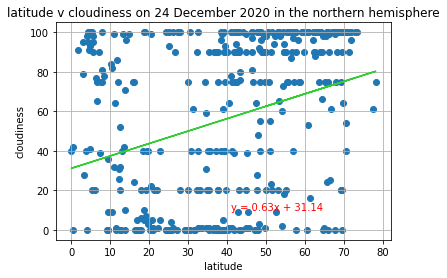

In [24]:
#scatter for northern hemisphere cloudiness v. lat
scatter_linreg(northern_hemi_data_df['lat'], northern_hemi_data_df['cloudiness'], 'latitude', 'cloudiness', '24 December 2020', 'northern')

The r-value is 0.47


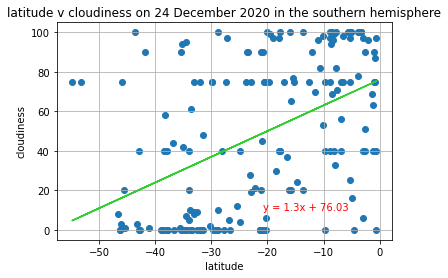

In [25]:
#scatter for southern hemisphere cloudiness v. lat
scatter_linreg(southern_hemi_data_df['lat'], southern_hemi_data_df['cloudiness'], 'latitude', 'cloudiness', '24 December 2020', 'southern')

The above graph shows a linear regression done on the latitude of all of the 553 randomly selected cities located in the northern hemisphere (378 cities) and in the southern hemisphere (175 cities), compared to those cities' cloudiness measured on 24 December 2020. The linear regression found a weak positive correlation between latitude and cloudiness (as latitude increases, so does cloudiness) in the northern hemisphere. As with the humidity plots, here the northern and southern hemispheres do not mirror each other: in the southern hemisphere, as latitude increases (grows closer to the equator), cloudiness also increases. The cloudiness could also be affected by seasonal fluctuation, or the difference in data points could be shifting the data. The stratification into bands of cloudiness observed in the graph including data from both hemispheres can be seen to a lesser degree in both graphs here, but more faintly in the southern hemisphere graph. These bands may play a role in why there is a large amount of spread outside of the plots of the linear regression.

The r-value is 0.17


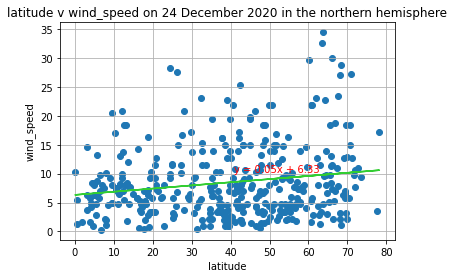

In [26]:
#scatter for northern hemisphere wind speed v. lat
scatter_linreg(northern_hemi_data_df['lat'], northern_hemi_data_df['wind_speed'], 'latitude', 'wind_speed', '24 December 2020', 'northern')

The r-value is -0.31


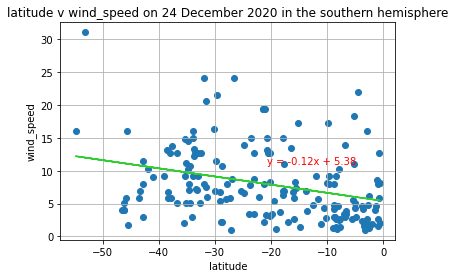

In [27]:
#scatter for southern hemisphere wind speed v. lat
scatter_linreg(southern_hemi_data_df['lat'], southern_hemi_data_df['wind_speed'], 'latitude', 'wind_speed', '24 December 2020', 'southern')

The above graph shows a linear regression done on the latitude of all of the 553 randomly selected cities located in the northern hemisphere (378 cities), and in the southern hemisphere (175 cities), compared to those cities' wind speeds, measured on 24 December 2020. The linear regression showed a very weak positive correlation between wind speed and latitude in the northern hemisphere. As with the northern hemisphere wind speed linear regression, the linear regression here showed a slight correlation (here negative). For wind speed, the hemispheres are mirroring each other. However, the correlations are weak, so it may be the case that there is no correlation, with potential outliers affecting the linear regression.